# Python machine learning project on global surface temperature 
The objective of this project is to manipulate the dataset regarding the global surface temperature for machine learning applications. This project includes extracting out useful datas for testing, data processing, 
and data cleaning for training the ML models.

## Resources used in this project
- [Logistic Regression](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)
- [Global surface temperature data](https://www.kaggle.com/datasets/sujaykapadnis/global-surface-temperatures)
- [Train Test Split](https://builtin.com/data-science/train-test-split)
- [Model_xy_test](https://datascience.stackexchange.com/questions/55379/how-does-model-scorex-test-y-tests-behave)
- [Bayesian Ridge Model ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#examples-using-sklearn-linear-model-bayesianridge)


## Dataframe

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [364]:
global_surface_temp = pd.read_csv("/Users/nicholas/Desktop/Project/Project_1/global_temps.csv") #import the global surfae temperature csv file on kaggle
global_surface_temp.head(10)  #display the first 10 rows of the data in a panda dataframe

## This dataset record the change of global surface temperature(not equivalent to the global temperature) from 1880 to 2023

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.09,-0.17,-0.10,-0.21,-0.18,-0.11,-0.15,-0.24,-0.22,-0.18,-0.17,NaN,NaN,-0.12,-0.17,-0.20
1,1881,-0.20,-0.15,0.03,0.05,0.05,-0.19,0.00,-0.04,-0.16,-0.22,-0.19,-0.08,-0.09,-0.10,-0.18,0.04,-0.08,-0.19
2,1882,0.16,0.13,0.04,-0.16,-0.14,-0.22,-0.17,-0.08,-0.15,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.14,-0.23,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.17,-0.10,-0.20
4,1884,-0.13,-0.09,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29
5,1885,-0.59,-0.34,-0.27,-0.42,-0.45,-0.44,-0.34,-0.32,-0.29,-0.24,-0.24,-0.11,-0.34,-0.35,-0.41,-0.38,-0.36,-0.25
6,1886,-0.44,-0.51,-0.43,-0.28,-0.24,-0.35,-0.18,-0.31,-0.24,-0.28,-0.28,-0.26,-0.32,-0.30,-0.35,-0.32,-0.28,-0.27
7,1887,-0.72,-0.57,-0.36,-0.35,-0.31,-0.25,-0.26,-0.36,-0.26,-0.36,-0.27,-0.33,-0.37,-0.36,-0.52,-0.34,-0.29,-0.29
8,1888,-0.34,-0.36,-0.41,-0.20,-0.22,-0.17,-0.11,-0.16,-0.12,0.01,0.03,-0.04,-0.17,-0.20,-0.34,-0.28,-0.14,-0.03
9,1889,-0.09,0.16,0.06,0.10,-0.01,-0.10,-0.08,-0.20,-0.24,-0.25,-0.33,-0.29,-0.11,-0.09,0.01,0.05,-0.13,-0.28


In [365]:
global_surface_temp.info()

##The column of "DJF", "MAM", "JJA", "SON" will mainly be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb     144 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     143 non-null    float64
 11  Nov     143 non-null    float64
 12  Dec     143 non-null    float64
 13  J-D     143 non-null    float64
 14  D-N     142 non-null    float64
 15  DJF     143 non-null    float64
 16  MAM     144 non-null    float64
 17  JJA     143 non-null    float64
 18  SON     143 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.5 KB


In [366]:
global_surface_temp.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,142.000000,143.000000,144.000000,143.000000,143.000000
mean,1951.500000,0.063333,0.070903,0.088889,0.063681,0.052917,0.033147,0.055874,0.054406,0.058182,0.084196,0.077762,0.051818,0.060210,0.060775,0.063566,0.068542,0.047692,0.072867
std,41.713307,0.423598,0.428513,0.433790,0.396609,0.377894,0.367363,0.347531,0.363304,0.360199,0.369290,0.376197,0.393168,0.369845,0.370719,0.404956,0.398376,0.355535,0.363067
min,1880.000000,-0.810000,-0.630000,-0.630000,-0.580000,-0.550000,-0.520000,-0.510000,-0.550000,-0.580000,-0.580000,-0.550000,-0.820000,-0.480000,-0.490000,-0.670000,-0.580000,-0.500000,-0.520000
25%,1915.750000,-0.240000,-0.240000,-0.222500,-0.250000,-0.240000,-0.250000,-0.190000,-0.220000,-0.190000,-0.200000,-0.175000,-0.220000,-0.200000,-0.210000,-0.225000,-0.252500,-0.215000,-0.190000
50%,1951.500000,-0.015000,-0.040000,0.015000,-0.025000,-0.040000,-0.050000,-0.030000,-0.050000,-0.060000,0.010000,0.020000,-0.040000,-0.060000,-0.055000,-0.020000,-0.025000,-0.050000,-0.010000
75%,1987.250000,0.310000,0.382500,0.322500,0.282500,0.272500,0.240000,0.235000,0.235000,0.240000,0.245000,0.230000,0.305000,0.265000,0.277500,0.315000,0.310000,0.235000,0.240000
max,2023.000000,1.180000,1.370000,1.360000,1.130000,1.020000,0.930000,0.940000,1.020000,0.990000,1.090000,1.110000,1.160000,1.020000,1.040000,1.240000,1.140000,0.940000,1.000000


## Extract out the data needed for analysis

In [367]:
seasonal_temp = global_surface_temp[["Year","DJF", "MAM", "JJA", "SON"]] #Extract out the meteorogical seasons & year
seasonal_temp.head(5)

,Year,DJF,MAM,JJA,SON
0,1880,NaN,-0.12,-0.17,-0.20
1,1881,-0.18,0.04,-0.08,-0.19
2,1882,0.07,-0.09,-0.16,-0.19
3,1883,-0.34,-0.17,-0.10,-0.20
4,1884,-0.11,-0.37,-0.32,-0.29


- DJF stands for December-January-February
- MAM stands for March-April-May
- JJA stands for June-July-August
- SON stands for September-October-November

In [368]:
seasonal_temp.isna().sum()

## There is a nan value in DJF column. The mean of the "DJF" column will be used to replace that value.

Year    0
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64

In [369]:
seasonal_temp = seasonal_temp.fillna(seasonal_temp.mean())
seasonal_temp.isna().sum()

Year    0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

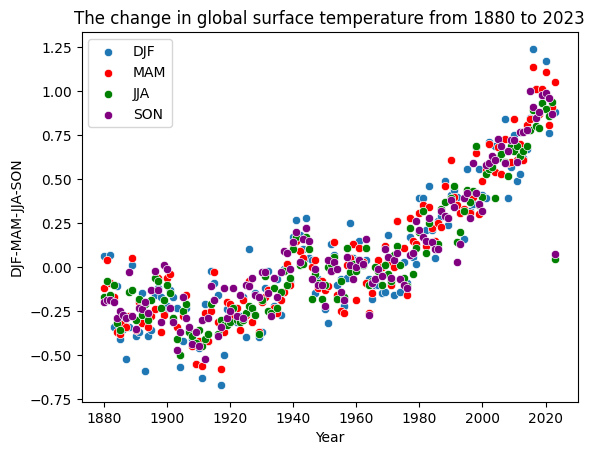

In [370]:
ax1 = sns.scatterplot(x="Year", y="DJF", data=seasonal_temp)
ax2 = sns.scatterplot(x="Year", y="MAM", data=seasonal_temp, color="red")
ax3 = sns.scatterplot(x="Year", y="JJA", data=seasonal_temp, color="green")
ax4 = sns.scatterplot(x="Year", y="SON", data=seasonal_temp, color="purple")

plt.title("The change in global surface temperature from 1880 to 2023")
plt.ylabel("DJF-MAM-JJA-SON")
plt.legend(labels=["DJF", "MAM", "JJA", "SON"])
plt.show()

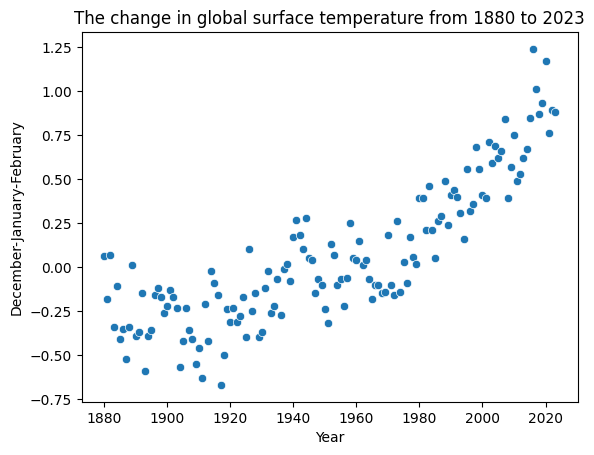

In [371]:
sns.scatterplot(x="Year", y="DJF", data=seasonal_temp)
plt.title("The change in global surface temperature from 1880 to 2023")
plt.ylabel("December-January-February")
plt.show()

## Data cleaning

In [372]:
seasonal_temp[["MAM", "JJA", "SON"]]
seasonal_temp[["MAM", "JJA", "SON"]].isnull()

,MAM,JJA,SON
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
139,False,False,False
140,False,False,False
141,False,False,False
142,False,False,False


In [373]:
seasonal_temp[["MAM", "JJA", "SON"]].iloc[143]

MAM    1.050000
JJA    0.047692
SON    0.072867
Name: 143, dtype: float64

In [374]:
seasonal_temp[["MAM", "JJA", "SON"]] = seasonal_temp[["MAM", "JJA", "SON"]].fillna(seasonal_temp[["MAM", "JJA", "SON"]].mean())
seasonal_temp[["MAM", "JJA", "SON"]].isnull().sum()

MAM    0
JJA    0
SON    0
dtype: int64

In [375]:
print (seasonal_temp[["MAM", "JJA", "SON"]].iloc[143])
print(f'The mean for column JJA :{seasonal_temp["JJA"].mean().round(6)}')
print(f'The mean for column SON :{seasonal_temp["SON"].mean().round(6)}')

## The null value is now replaced by the mean of the column.

MAM    1.050000
JJA    0.047692
SON    0.072867
Name: 143, dtype: float64
The mean for column JJA :0.047692
The mean for column SON :0.072867


## Machine learning with Decison Tree Regression model from sklearn

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = seasonal_temp[["MAM", "JJA", "SON"]]
Y = seasonal_temp["DJF"].fillna(seasonal_temp["DJF"].mean())
year = seasonal_temp["Year"]

X_train, X_test, Y_train, Y_test, year_train, year_test = train_test_split(X, Y, year, test_size = 0.15)


In [377]:
X_train

,MAM,JJA,SON
81,0.11,0.04,0.04
32,-0.26,-0.41,-0.52
5,-0.38,-0.36,-0.25
87,0.04,-0.02,-0.01
111,0.40,0.46,0.34
...,...,...,...
141,0.81,0.86,0.96
95,0.11,-0.06,-0.10
14,-0.34,-0.30,-0.26
127,0.73,0.60,0.59


In [378]:
Y_train

81     0.15
32    -0.21
5     -0.41
87    -0.10
111    0.44
       ... 
141    0.76
95     0.03
14    -0.39
127    0.84
17    -0.12
Name: DJF, Length: 122, dtype: float64

Need to change the axis of graph, actual data SHOULD BE Y_test and the prediction from the model SHOULD BE Y_pred, which is Prediction_015 & Prediction_015_2; Double Check if DJF is the result

In [379]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

Prediction_015 = model.predict(X_test) #this is Y_pred (compare it to Y_test)
print(Prediction_015)


[ 0.24  0.26  0.02 -0.1   0.1  -0.5  -0.14 -0.27 -0.14 -0.07 -0.12 -0.42
 -0.1  -0.4  -0.1  -0.09 -0.26 -0.39  0.39 -0.12  0.49 -0.09]


In [380]:
Y_test =Y_test.round(2)
print(Y_test)
print(len(Y_test))

97     0.17
143    0.88
77    -0.06
85    -0.18
65     0.05
49    -0.40
98     0.06
50    -0.37
86    -0.10
76    -0.22
1     -0.18
37    -0.67
59    -0.08
48    -0.15
68    -0.07
70    -0.24
13    -0.59
12    -0.15
113    0.31
80     0.04
116    0.32
2      0.07
Name: DJF, dtype: float64
22


In [381]:
model.score(X_test, Y_test)  #least-sqaure betweem 2 tests 

0.6005596575448173

In [382]:
predict_result = pd.DataFrame({"Row_Index": Y_test.index, "Original_Data": Y_test, "Predicted_Data_DTRmodel": Prediction_015})
predict_result = predict_result.sort_values(by="Row_Index", ascending=True)
predict_result

,Row_Index,Original_Data,Predicted_Data_DTRmodel
1,1,-0.18,-0.12
2,2,0.07,-0.09
12,12,-0.15,-0.39
13,13,-0.59,-0.26
37,37,-0.67,-0.42
48,48,-0.15,-0.40
49,49,-0.40,-0.50
50,50,-0.37,-0.27
59,59,-0.08,-0.10
65,65,0.05,0.10


In [383]:
display(predict_result.iloc[0])
display(seasonal_temp["DJF"].iloc[4])   #check if these values are the same; it should be equal to the original data  -> True

display(len(predict_result))  

Row_Index                  1.00
Original_Data             -0.18
Predicted_Data_DTRmodel   -0.12
Name: 1, dtype: float64

-0.11

22

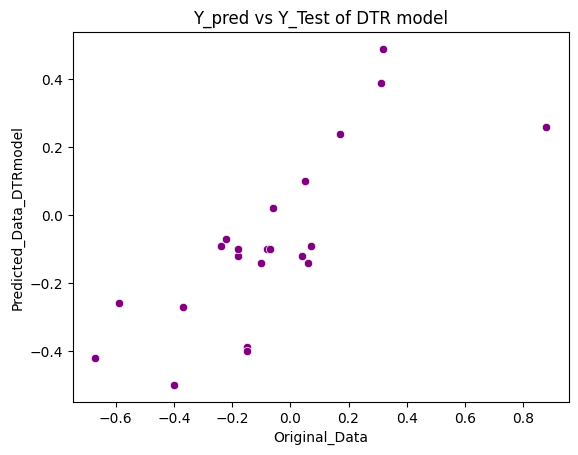

In [384]:
sns.scatterplot(data=predict_result, x="Original_Data", y="Predicted_Data_DTRmodel", color="purple")
plt.title("Y_pred vs Y_Test of DTR model")
plt.show()

## Machine learning with BayesianRidge(Linear Model) from sklearn

In [385]:
from sklearn import linear_model
model_2 = linear_model.BayesianRidge()
model_2.fit(X_train, Y_train)

BayesianRidge()

In [386]:
Prediction_015_2 = model_2.predict(X_test)
Prediction_015_2 = Prediction_015_2.round(2)
print(Prediction_015_2)
print(len(Prediction_015_2))

[ 0.28  0.89  0.03 -0.13  0.1  -0.38  0.12 -0.2  -0.05 -0.24  0.04 -0.52
 -0.09 -0.27 -0.11 -0.11 -0.25 -0.31  0.3  -0.16  0.33 -0.09]
22


In [387]:
model_2.score(X_test, Y_test)

0.8362792077122698

In [388]:
print(len(Prediction_015_2))

22


In [389]:
predict_result_2 = pd.DataFrame({"Row_Index": Y_test.index, "Original_Data": Y_test, "Predicted_Data_BRmodel": Prediction_015_2})
predict_result_2 = predict_result_2.sort_values(by="Row_Index", ascending=True)
predict_result_2

,Row_Index,Original_Data,Predicted_Data_BRmodel
1,1,-0.18,0.04
2,2,0.07,-0.09
12,12,-0.15,-0.31
13,13,-0.59,-0.25
37,37,-0.67,-0.52
48,48,-0.15,-0.27
49,49,-0.40,-0.38
50,50,-0.37,-0.20
59,59,-0.08,-0.09
65,65,0.05,0.10


In [390]:
display(predict_result_2.iloc[0])
display(seasonal_temp["DJF"].iloc[4])   #check if these values are the same; it should be equal to the original data  -> True

display(len(predict_result_2))  

Row_Index                 1.00
Original_Data            -0.18
Predicted_Data_BRmodel    0.04
Name: 1, dtype: float64

-0.11

22

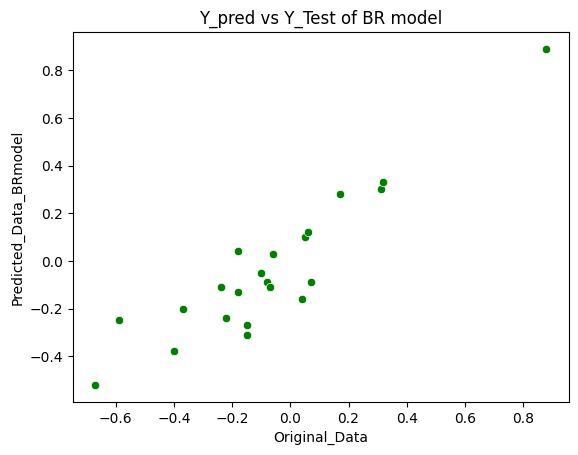

In [391]:
sns.scatterplot(data=predict_result_2, x="Original_Data", y="Predicted_Data_BRmodel", color="green")
plt.title("Y_pred vs Y_Test of BR model")
plt.show()

## Comparison between these two models

In [392]:
final_table = pd.merge(predict_result, predict_result_2)
final_table

,Row_Index,Original_Data,Predicted_Data_DTRmodel,Predicted_Data_BRmodel
0,1,-0.18,-0.12,0.04
1,2,0.07,-0.09,-0.09
2,12,-0.15,-0.39,-0.31
3,13,-0.59,-0.26,-0.25
4,37,-0.67,-0.42,-0.52
5,48,-0.15,-0.40,-0.27
6,49,-0.40,-0.50,-0.38
7,50,-0.37,-0.27,-0.20
8,59,-0.08,-0.10,-0.09
9,65,0.05,0.10,0.10


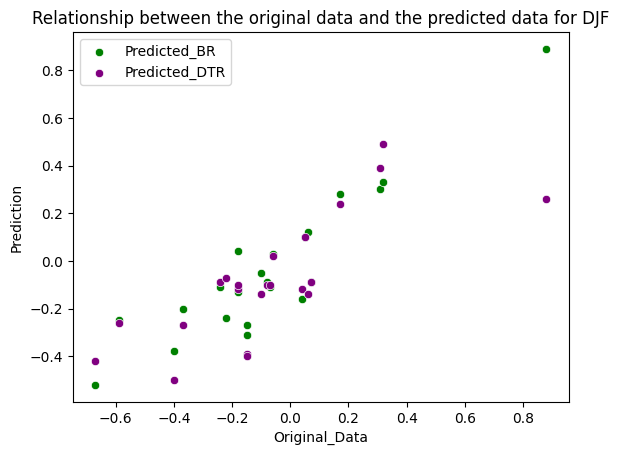

In [394]:
ax5 = sns.scatterplot(data=final_table, x="Original_Data", y="Predicted_Data_BRmodel", color="green") 
ax6 = sns.scatterplot(data=final_table, x="Original_Data", y="Predicted_Data_DTRmodel", color="purple")

plt.legend(labels=["Predicted_BR", "Predicted_DTR", "Original"])
plt.title("Relationship between the original data and the predicted data for DJF")
plt.ylabel("Prediction")
plt.show()

In [403]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE_DTR = mean_absolute_error(Prediction_015, Y_test)
MSE_DTR = mean_squared_error(Prediction_015, Y_test)
R2_DTR = r2_score(Prediction_015, Y_test)

MAE_BR = mean_absolute_error(Prediction_015_2, Y_test)
MSE_BR = mean_squared_error(Prediction_015_2, Y_test)
R2_BR = r2_score(Prediction_015_2, Y_test)

performance_dict = {"MAE": [MAE_DTR, MAE_BR], "MSE": [MSE_DTR, MSE_BR], "R2": [R2_DTR, R2_BR]}
Performance = pd.DataFrame(performance_dict)
Performance.index = ["DTR_Model", "BR_Model"]
Performance

,MAE,MSE,R2
DTR_Model,0.154091,0.040641,0.350683
BR_Model,0.099091,0.016909,0.803698


MAE: the lower the better & R2 the hight the better: BR is a superior model in this case

Project ends